In [51]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as pp
import seaborn as sns
%matplotlib inline

In [52]:
datasets = []
for i in range(1,32):
    datasets.append(pd.read_csv('./dds_datasets/dds_ch2_nyt/nyt' + str(i) +'.csv'))

In [53]:
df = pd.DataFrame()

In [54]:
df = datasets[0]
for i in range(1,len(datasets)):
    df.append(datasets[i])

In [55]:
len(df)

458441

In [56]:
del(datasets)

In [57]:
agegroup = {
    '<18' : df[df['Age'] < 18],
    '18-24' : df[(df['Age'] > 17) & (df['Age'] < 25)],
    '25-34' : df[(df['Age']) > 24 & (df['Age'] < 35)],
    '35-44' : df[(df['Age']) > 34 & (df['Age'] < 45)],
    '45-54' : df[(df['Age']) > 44 & (df['Age'] < 55)],
    '55-64' : df[(df['Age']) > 54 & (df['Age'] < 65)],
    '65+' : df[df['Age'] > 64]
    }

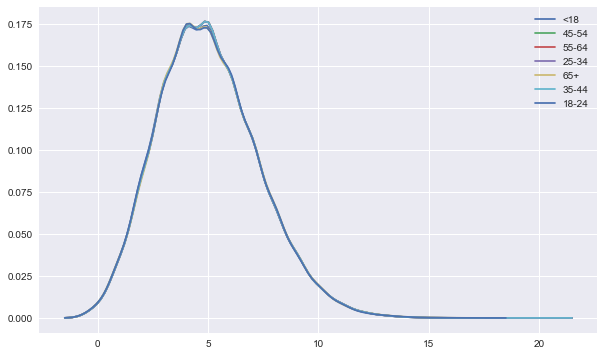

In [59]:
pp.figure(figsize=(10,6))
for key in agegroup.keys():
    sns.kdeplot(np.array(agegroup[key]['Impressions']), shade=False, bw=0.5, label=key)
pp.legend()

In [62]:
#sns.distplot(np.array(agegroup['35-44']['Clicks']))

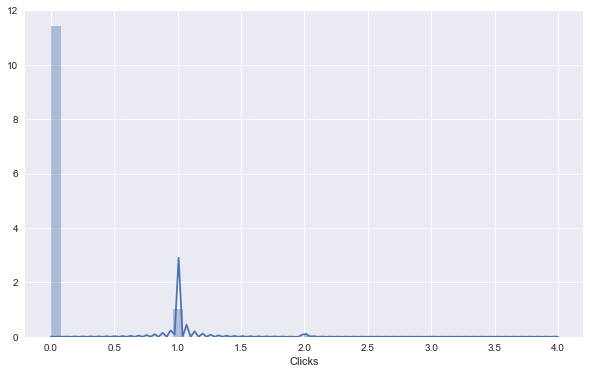

In [63]:
pp.figure(figsize=(10,6))
sns.distplot(df['Clicks'])

In [69]:
ctr = dict.fromkeys(agegroup.keys())
for key in ctr.keys():
    ctr[key] = agegroup[key]['Clicks'].sum() / agegroup[key]['Impressions'].sum()

In [70]:
ctr

{'18-24': 0.010644202667190608,
 '25-34': 0.014265786211334123,
 '35-44': 0.014265786211334123,
 '45-54': 0.014265786211334123,
 '55-64': 0.014265786211334123,
 '65+': 0.030183180682764363,
 '<18': 0.028546935162881166}

<Container object of 7 artists>

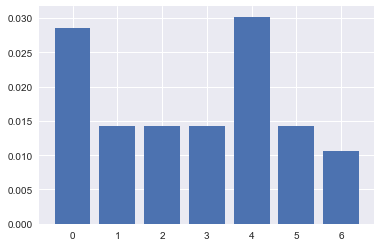

In [71]:
pp.bar(range(len(ctr.keys())),list(ctr.values()))

In [74]:
ctr = dict.fromkeys(agegroup.keys())
for key in list(ctr.keys()):
    ctr[key] = agegroup[key]['Clicks'] / agegroup[key]['Impressions']

In [75]:
for key in list(ctr.keys()):
    print(ctr[key].describe())

count    149909.000000
mean          0.028531
std           0.085545
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64
count    319198.000000
mean          0.014254
std           0.060280
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64
count    319198.000000
mean          0.014254
std           0.060280
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64
count    319198.000000
mean          0.014254
std           0.060280
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64
count    28556.000000
mean         0.029803
std          0.084049
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
dtype: float64
count    3191

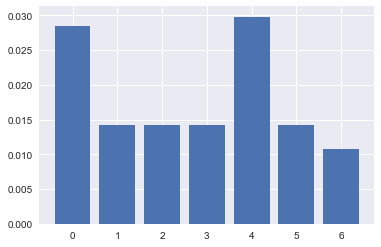

In [76]:
for key in ctr.keys():
    pp.bar(range(len(ctr.keys())),[np.mean(v) for v in ctr.values()])